## Compare cortex DEGs from BL2 hours, bri1-T and Dev Cell Atlas Cortex Trajectories

In [1]:
library(tidyverse)
library(Seurat)
library(cowplot)
library(ComplexHeatmap)
library(circlize)
library(GeneOverlap)
library(gprofiler2)
library(readxl)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.5     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Registered S3 method overwritten by 'spatstat.geom':
  method     from
  print.boxx cli 

Attaching SeuratObject

Loading required package: grid

ComplexHeatmap version 2.11.1
Bioconductor page: http://bioconductor.org/packages/ComplexHeatmap/
Github page: https://github.com/jokergoo/ComplexHeatmap
Documentation: http://jokergoo.github.io/ComplexHeatmap-reference

If you use it in published research, please cite:
Gu, Z. Complex heatmaps reveal patterns and correlations in multidimensional 
  genomic data. Bioinformatics 2016.

The new InteractiveComplexHeatmap package can directly export static 
complex hea

In [2]:
sessionInfo()

R version 4.0.0 (2020-04-24)
Platform: x86_64-conda_cos6-linux-gnu (64-bit)
Running under: Ubuntu 16.04.6 LTS

Matrix products: default
BLAS/LAPACK: /home/tmnolan7/anaconda3/envs/r_4/lib/libopenblasp-r0.3.9.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] grid      stats     graphics  grDevices utils     datasets  methods  
[8] base     

other attached packages:
 [1] readxl_1.3.1          gprofiler2_0.2.0      GeneOverlap_1.24.0   
 [4] circlize_0.4.14       ComplexHeatmap_2.11.1 cowplot_1.1.0        
 [7] SeuratObject_4.0.2    Seurat_4.0.5          forcats_0.5.0        
[10] stringr_1.4.0         dplyr_1.0.7           purrr_0.3.4          
[13]

In [4]:
BL2_hr <- read_csv("./output/v4_BL2hr_v_BRZ_cell_time_EdgeR_q0.05_FC1.5_r_v_4_20220112.csv")

cortex_BL2_hr <- filter(BL2_hr, str_detect(cluster_id, 'Cortex')) %>%
filter(up_dn_label=="Up")

Warning message:
“Missing column names filled in: 'X1' [1]”

── Column specification ────────────────────────────────────────────────────────
cols(
  .default = col_double(),
  gene = col_character(),
  cluster_id = col_character(),
  contrast = col_character(),
  Name = col_character(),
  TF_Name = col_character(),
  Description = col_character(),
  up_dn_label = col_character(),
  clust_up_dn = col_character()
)
ℹ Use `spec()` for the full column specifications.




[1] 1439

In [5]:
# number unique Up genes in all zones of cortex for BL 2 hours vs BRZ

length(unique(cortex_BL2_hr$gene))

[1] 1439

In [6]:
bri1_T <- read_csv("./output/v4_bri1_T_v_WT_cell_time_EdgeR_q0.05_FC1.5_r_v_4_20220112.csv")
cortex_bri1_T_dn <- filter(bri1_T, str_detect(cluster_id, 'Cortex')) %>%
filter(up_dn_label=="Down")

Warning message:
“Missing column names filled in: 'X1' [1]”

── Column specification ────────────────────────────────────────────────────────
cols(
  .default = col_double(),
  gene = col_character(),
  cluster_id = col_character(),
  contrast = col_character(),
  Name = col_character(),
  TF_Name = col_character(),
  Description = col_character(),
  up_dn_label = col_character(),
  clust_up_dn = col_character()
)
ℹ Use `spec()` for the full column specifications.




In [7]:
# number unique Down genes in all zones of cortex for bri1-T vs WT

length(unique(cortex_bri1_T_dn$gene))

[1] 2512

In [8]:
# Genes DE along WT cortex trajectories from Dev Cell Atlas

WT_cortex_traj_genes <- read_excel("./data/Shahan_2022_Dataset_S5_Final.xlsx", 
    sheet = "C) All DE genes_GT", skip = 15) %>%
filter(celltype=="Cortex")

In [9]:
(BL_bri1_T_and_WT_traj_genes <- filter(WT_cortex_traj_genes, `gene ID` %in% cortex_BL2_hr$gene) %>%
filter(`gene ID` %in% cortex_bri1_T_dn$gene))

myAUC,avg_diff,power,pct.1,pct.2,celltype,pseudotime bin,gene ID,gene name,pct.diff,pct.diff_rank,avg_diff_rank,myAUC_rank,combined_rank
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.880,1.977404,0.760,0.927,0.253,Cortex,T5,AT1G41830,SKS6,0.674,1,9,2,1
0.829,1.921177,0.658,0.761,0.217,Cortex,T7,AT3G18200,AT3G18200,0.544,14,12,10,1
0.872,1.858140,0.744,0.901,0.249,Cortex,T4,AT5G12940,AT5G12940,0.652,3,28,3,2
0.823,1.463082,0.646,0.914,0.343,Cortex,T6,AT5G64620,C/VIF2,0.571,6,26,11,2
0.883,1.961671,0.766,0.922,0.251,Cortex,T3,AT5G12940,AT5G12940,0.671,2,43,2,3
0.866,1.897673,0.732,0.934,0.313,Cortex,T4,AT5G03760,CSLA9,0.621,6,23,5,3
0.858,2.426638,0.716,0.683,0.141,Cortex,T3,AT1G14080,FUT6,0.542,33,5,11,4
0.850,1.882508,0.700,0.886,0.285,Cortex,T4,AT5G01330,PDC3,0.601,9,24,14,4
0.862,1.982572,0.724,0.952,0.374,Cortex,T5,AT1G64390,AtGH9C2,0.578,13,8,7,4


In [10]:
# number unique Up genes in all zones of cortex for BL 2 hours vs BRZ, down in bri1-T and in Dev Cell consensus time DE

length(unique(BL_bri1_T_and_WT_traj_genes$`gene ID`))

[1] 163

# Prep Upset plot

In [12]:
gene_names <- read.csv("./data/features.tsv.gz", sep="\t", header=FALSE)

In [13]:
gene_names

V1,V2,V3
<chr>,<chr>,<chr>
AT1G01010,NAC001,Gene Expression
AT1G01020,ARV1,Gene Expression
AT1G03987,AT1G03987,Gene Expression
AT1G01030,NGA3,Gene Expression
AT1G01040,DCL1,Gene Expression
AT1G03993,AT1G03993,Gene Expression
AT1G01046,MIR838A,Gene Expression
AT1G01050,PPA1,Gene Expression
AT1G03997,AT1G03997,Gene Expression


In [14]:
gene_names$BL <- as.numeric(gene_names$V1 %in% cortex_BL2_hr$gene)

In [15]:
gene_names$bri <- as.numeric(gene_names$V1 %in% cortex_bri1_T_dn$gene)

In [16]:
gene_names$cortex_traj <- as.numeric(gene_names$V1 %in% WT_cortex_traj_genes$`gene ID`)

In [17]:
(gene_names <- select(gene_names, V1, BL, bri, cortex_traj))

V1,BL,bri,cortex_traj
<chr>,<dbl>,<dbl>,<dbl>
AT1G01010,0,1,0
AT1G01020,0,0,0
AT1G03987,0,0,0
AT1G01030,0,0,0
AT1G01040,0,0,0
AT1G03993,0,0,0
AT1G01046,0,0,0
AT1G01050,0,0,0
AT1G03997,0,0,0


In [19]:
gene_names$Row <- paste0("R", rep(1:nrow(gene_names)))

In [20]:
(gene_names <- select(gene_names, Row, BL, bri, cortex_traj))

Row,BL,bri,cortex_traj
<chr>,<dbl>,<dbl>,<dbl>
R1,0,1,0
R2,0,0,0
R3,0,0,0
R4,0,0,0
R5,0,0,0
R6,0,0,0
R7,0,0,0
R8,0,0,0
R9,0,0,0


In [22]:
write_csv(gene_names, file = "./output/163_for_upset.csv")

# UpSet with ComplexHeatmap

In [23]:
lt = list(`BL Cortex Up` = unique(cortex_BL2_hr$gene),
          `bri1-T Cortex Down` = unique(cortex_bri1_T_dn$gene),
          `WT Cortex Trajectory` = unique(WT_cortex_traj_genes$`gene ID`))

m = make_comb_mat(lt)

In [24]:
m2_or_more <- m[comb_degree(m) >= 2]

In [25]:

up_hm <- UpSet(t(m2_or_more), 
      set_order = order(set_size(m), decreasing = F), 
              column_names_rot = 45)

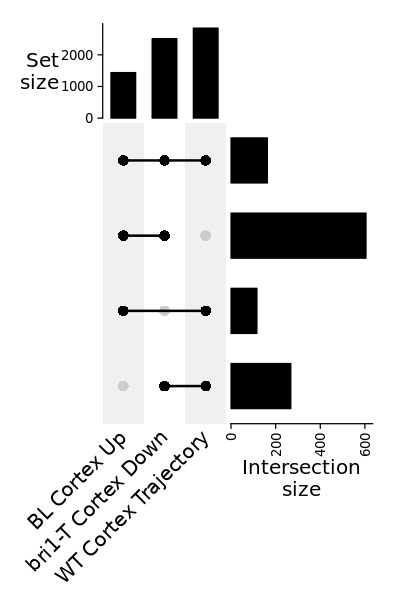

In [26]:
options(repr.plot.width=3.5, repr.plot.height=5)

   # padding - bottom, left, top, right
draw(up_hm, padding = unit(c(5, 5, 5, 10), "mm"))

In [27]:
pdf(("./output/163_genes_upset.pdf"), width = 3.5, height = 5)

draw(up_hm, padding = unit(c(5, 5, 5, 10), "mm"))

dev.off()

png 
  2